<a href="https://colab.research.google.com/github/sm0223/boston_housing_ypred/blob/main/housing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Input Features
 1) CRIM: per capita crime rate by town 
 2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
 3) INDUS: proportion of non-retail business acres per town
 4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
 5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
 6) RM: average number of rooms per dwelling
 7) AGE: proportion of owner-occupied units built prior to 1940
 8) DIS: weighted distances to five Boston employment centres
 9) RAD: index of accessibility to radial highways
 10) TAX: full-value property-tax rate per $10,000 [$/10k]
 11) PTRATIO: pupil-teacher ratio by town
 12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 13) LSTAT: % lower status of the population

# Problem Statement
 Explore Various LInear Regression Model to predict Median value of Owner Occupied Houses

Output variable:
 1) MEDV: Median value of owner-occupied homes in $1000's [k$]
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #For getting the heatmap
from cmath import inf as infinite
from sklearn import preprocessing
from sklearn import linear_model


In [2]:
df = pd.read_csv("boston.csv");
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


#  Splitting Data for Training Model and Test

In [3]:
train = df.sample(frac = 0.75, random_state= 200)
test = df.drop(train.index)
train
# test.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
207,0.25199,0.0,10.59,0,0.489,5.783,72.7,4.3549,4,277.0,18.6,389.43,18.06,22.5
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307.0,21.0,396.90,8.26,20.4
22,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307.0,21.0,396.90,18.72,15.2
369,5.66998,0.0,18.10,1,0.631,6.683,96.8,1.3567,24,666.0,20.2,375.33,3.73,50.0
444,12.80230,0.0,18.10,0,0.740,5.854,96.6,1.8956,24,666.0,20.2,240.52,23.79,10.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391.0,19.2,396.90,14.33,16.8
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233.0,17.9,396.90,10.21,19.3
149,2.73397,0.0,19.58,0,0.871,5.597,94.9,1.5257,5,403.0,14.7,351.85,21.45,15.4
364,3.47428,0.0,18.10,1,0.718,8.780,82.9,1.9047,24,666.0,20.2,354.55,5.29,21.9


## Data Analysis

In [4]:
train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,3.823358,11.048684,11.399053,0.063158,0.558408,6.269495,69.285789,3.747323,9.810526,413.102632,18.536053,356.795526,12.984158,22.223421
std,9.148303,22.965981,6.866142,0.243567,0.116401,0.719133,27.901564,2.068384,8.775469,170.462532,2.173695,90.724360,7.283353,9.320596
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,188.000000,12.600000,2.520000,1.920000,5.000000
25%,0.090170,0.000000,5.560000,0.000000,0.458000,5.876500,45.675000,2.083175,4.000000,283.250000,17.400000,376.132500,7.320000,16.500000
50%,0.295030,0.000000,9.900000,0.000000,0.538000,6.175000,78.500000,3.142300,5.000000,330.000000,19.100000,391.045000,11.675000,20.700000
75%,4.232120,12.500000,18.100000,0.000000,0.631000,6.590750,94.300000,5.104475,24.000000,666.000000,20.200000,395.755000,17.225000,24.800000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,0.197045,0.388290,0.049127,0.408478,0.182649,0.340906,0.373578,0.608701,0.564052,0.274315,0.363056,0.408449,0.373021
ZN,0.197045,1.000000,0.535738,0.026022,0.510895,0.310251,0.556852,0.644917,0.317553,0.338598,0.374635,0.176242,0.405367,0.362347
INDUS,0.388290,0.535738,1.000000,0.063003,0.742297,0.368962,0.634956,0.708609,0.582413,0.721621,0.356103,0.344629,0.576978,0.455669
CHAS,0.049127,0.026022,0.063003,1.000000,0.109928,0.102932,0.091294,0.094793,0.015489,0.003588,0.086541,0.074557,0.048100,0.167756
NOX,0.408478,0.510895,0.742297,0.109928,1.000000,0.273982,0.728746,0.774146,0.610134,0.668121,0.150546,0.362098,0.574406,0.401375
RM,0.182649,0.310251,0.368962,0.102932,0.273982,1.000000,0.218358,0.188322,0.175265,0.271707,0.357380,0.131125,0.611161,0.699442
AGE,0.340906,0.556852,0.634956,0.091294,0.728746,0.218358,1.000000,0.744979,0.457582,0.515823,0.218878,0.263777,0.586616,0.348804
DIS,0.373578,0.644917,0.708609,0.094793,0.774146,0.188322,0.744979,1.000000,0.503386,0.550628,0.187027,0.296534,0.478529,0.228516
RAD,0.608701,0.317553,0.582413,0.015489,0.610134,0.175265,0.457582,0.503386,1.000000,0.904972,0.455411,0.420601,0.451644,0.359353
TAX,0.564052,0.338598,0.721621,0.003588,0.668121,0.271707,0.515823,0.550628,0.904972,1.000000,0.456125,0.422576,0.521443,0.454483


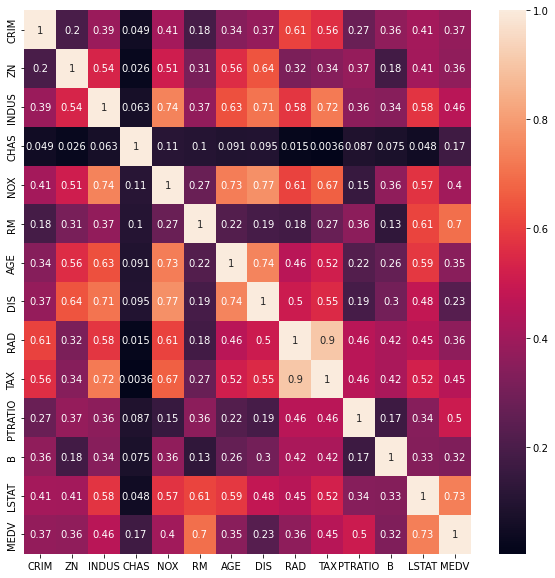

In [5]:
co_rel = train.corr().abs()
plt.figure(figsize=(10, 10))
sns.heatmap(co_rel, annot = True)
co_rel

**Points taken from the heatmap and labels** 

1. The above heat map shows **RAD** and **TAX** columns are highly positively correlated(property tax is proportional to accesibility to highway which seems logical) thus, one of them can be dropped.

2. Although **AGE** and **NOX** seems to correlated in the data but I decided to keep it as they donot seem to have any logical correlation
3. Dropping  **DIS**, as it seems to be correlated with multiple features.
4. Dropping **CHAS** as it seems to have very little effect on our target(MEDV).
    

# Multiple Linear Regression

**Intital Variables**

In [6]:
X = train[['RM', 'LSTAT','TAX']] # Dropping the said features
y = train['MEDV'] #Target
m = y.size #no of training data rows
x = np.hstack((np.ones((m,1)), X)) 
n = X.shape[1] #no. of features
α = 0.0001   #learning rate
θ = np.ones(n)  

In [7]:
print("Dimensions of 'x' :",x.shape)
print("Dimensions of 'y' :",y.shape)
print("Dimensions of 'θ' :",θ.shape)

Dimensions of 'x' : (380, 4)
Dimensions of 'y' : (380,)
Dimensions of 'θ' : (3,)


In [8]:
def gradient_descent(x, y, m, θ, α):
    cost_list = []   #to record all cost values to this list
    cost_list.append(1e10)  # intital cost
    i=0
    change =1
    while change > 1e-5: 
        ypred = np.dot(x, θ)  
        error = ypred - y
        cost = 1/(2*m) * np.dot(error.T, error)   #  (1/2m)*sum[(error)^2]
        cost_list.append(cost)
        θ = θ - (α * (1/m) * np.dot(x.T, error))   # α * (1/m) * sum[error*x]
        change = cost_list[i]-cost_list[i+1] 
        i+=1
    cost_list.pop(0) 
    return cost_list, θ, i


In [9]:
cost_list, θ, i = gradient_descent(x, y, m, θ, α)

ValueError: shapes (380,4) and (3,) not aligned: 4 (dim 1) != 3 (dim 0)

36164846.81841234


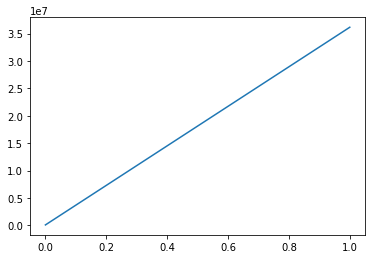

In [ ]:
print(cost_list[-1])

plt.plot(cost_list)